Metabolic Chamber Data Analysis: CHOW vs. Breeder Preference (sated)

In [1]:
# Import pertinent packages

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Upload data
data = pd.read_csv('20221201_chowbreederpref_sated_EC.csv', sep=',')

Data Wrangling

In [3]:
# Separate data by each box

boxdata = []
for i in range(0,9):
    boxdata.append(data.loc[data['Box'] == i])
    
# boxdata[#] gives you data per box; # = actual box number

In [4]:
# Create an array of dates

dates = np.array(["12/1/22", "12/2/22", "12/3/22", "12/4/22", "12/5/22"])

In [5]:
# Define a function to separate each box's data by date 

def boxdatafxn(boxdatabox, date_array):
    boxdata_bydate = []
    
    for i in range(len(date_array)):
        boxdata_bydate.append(boxdatabox.loc[boxdatabox['Date'] == date_array[i]])

    return boxdata_bydate

In [6]:
# Iterate function over each box

# Create an empty list to store data
dates_boxdata = []

for i in range(len(boxdata)):
    dates_boxdata.append(boxdatafxn(boxdata[i], dates))
    
# Output: dates_boxdata[box number (1-8)][day (0-4)]['ColumnName']
# To get single rows of data: ie dates_boxdata[1][4]['Drink1'].iloc[row number]

In [26]:
len(dates_boxdata)

9

In [7]:
# Create an array of titles for plotting

title = np.array(["Mouse 1", "Mouse 2", "Mouse 3", "Mouse 4", "Mouse 5", "Mouse 6", "Mouse 7", "Mouse 8"])

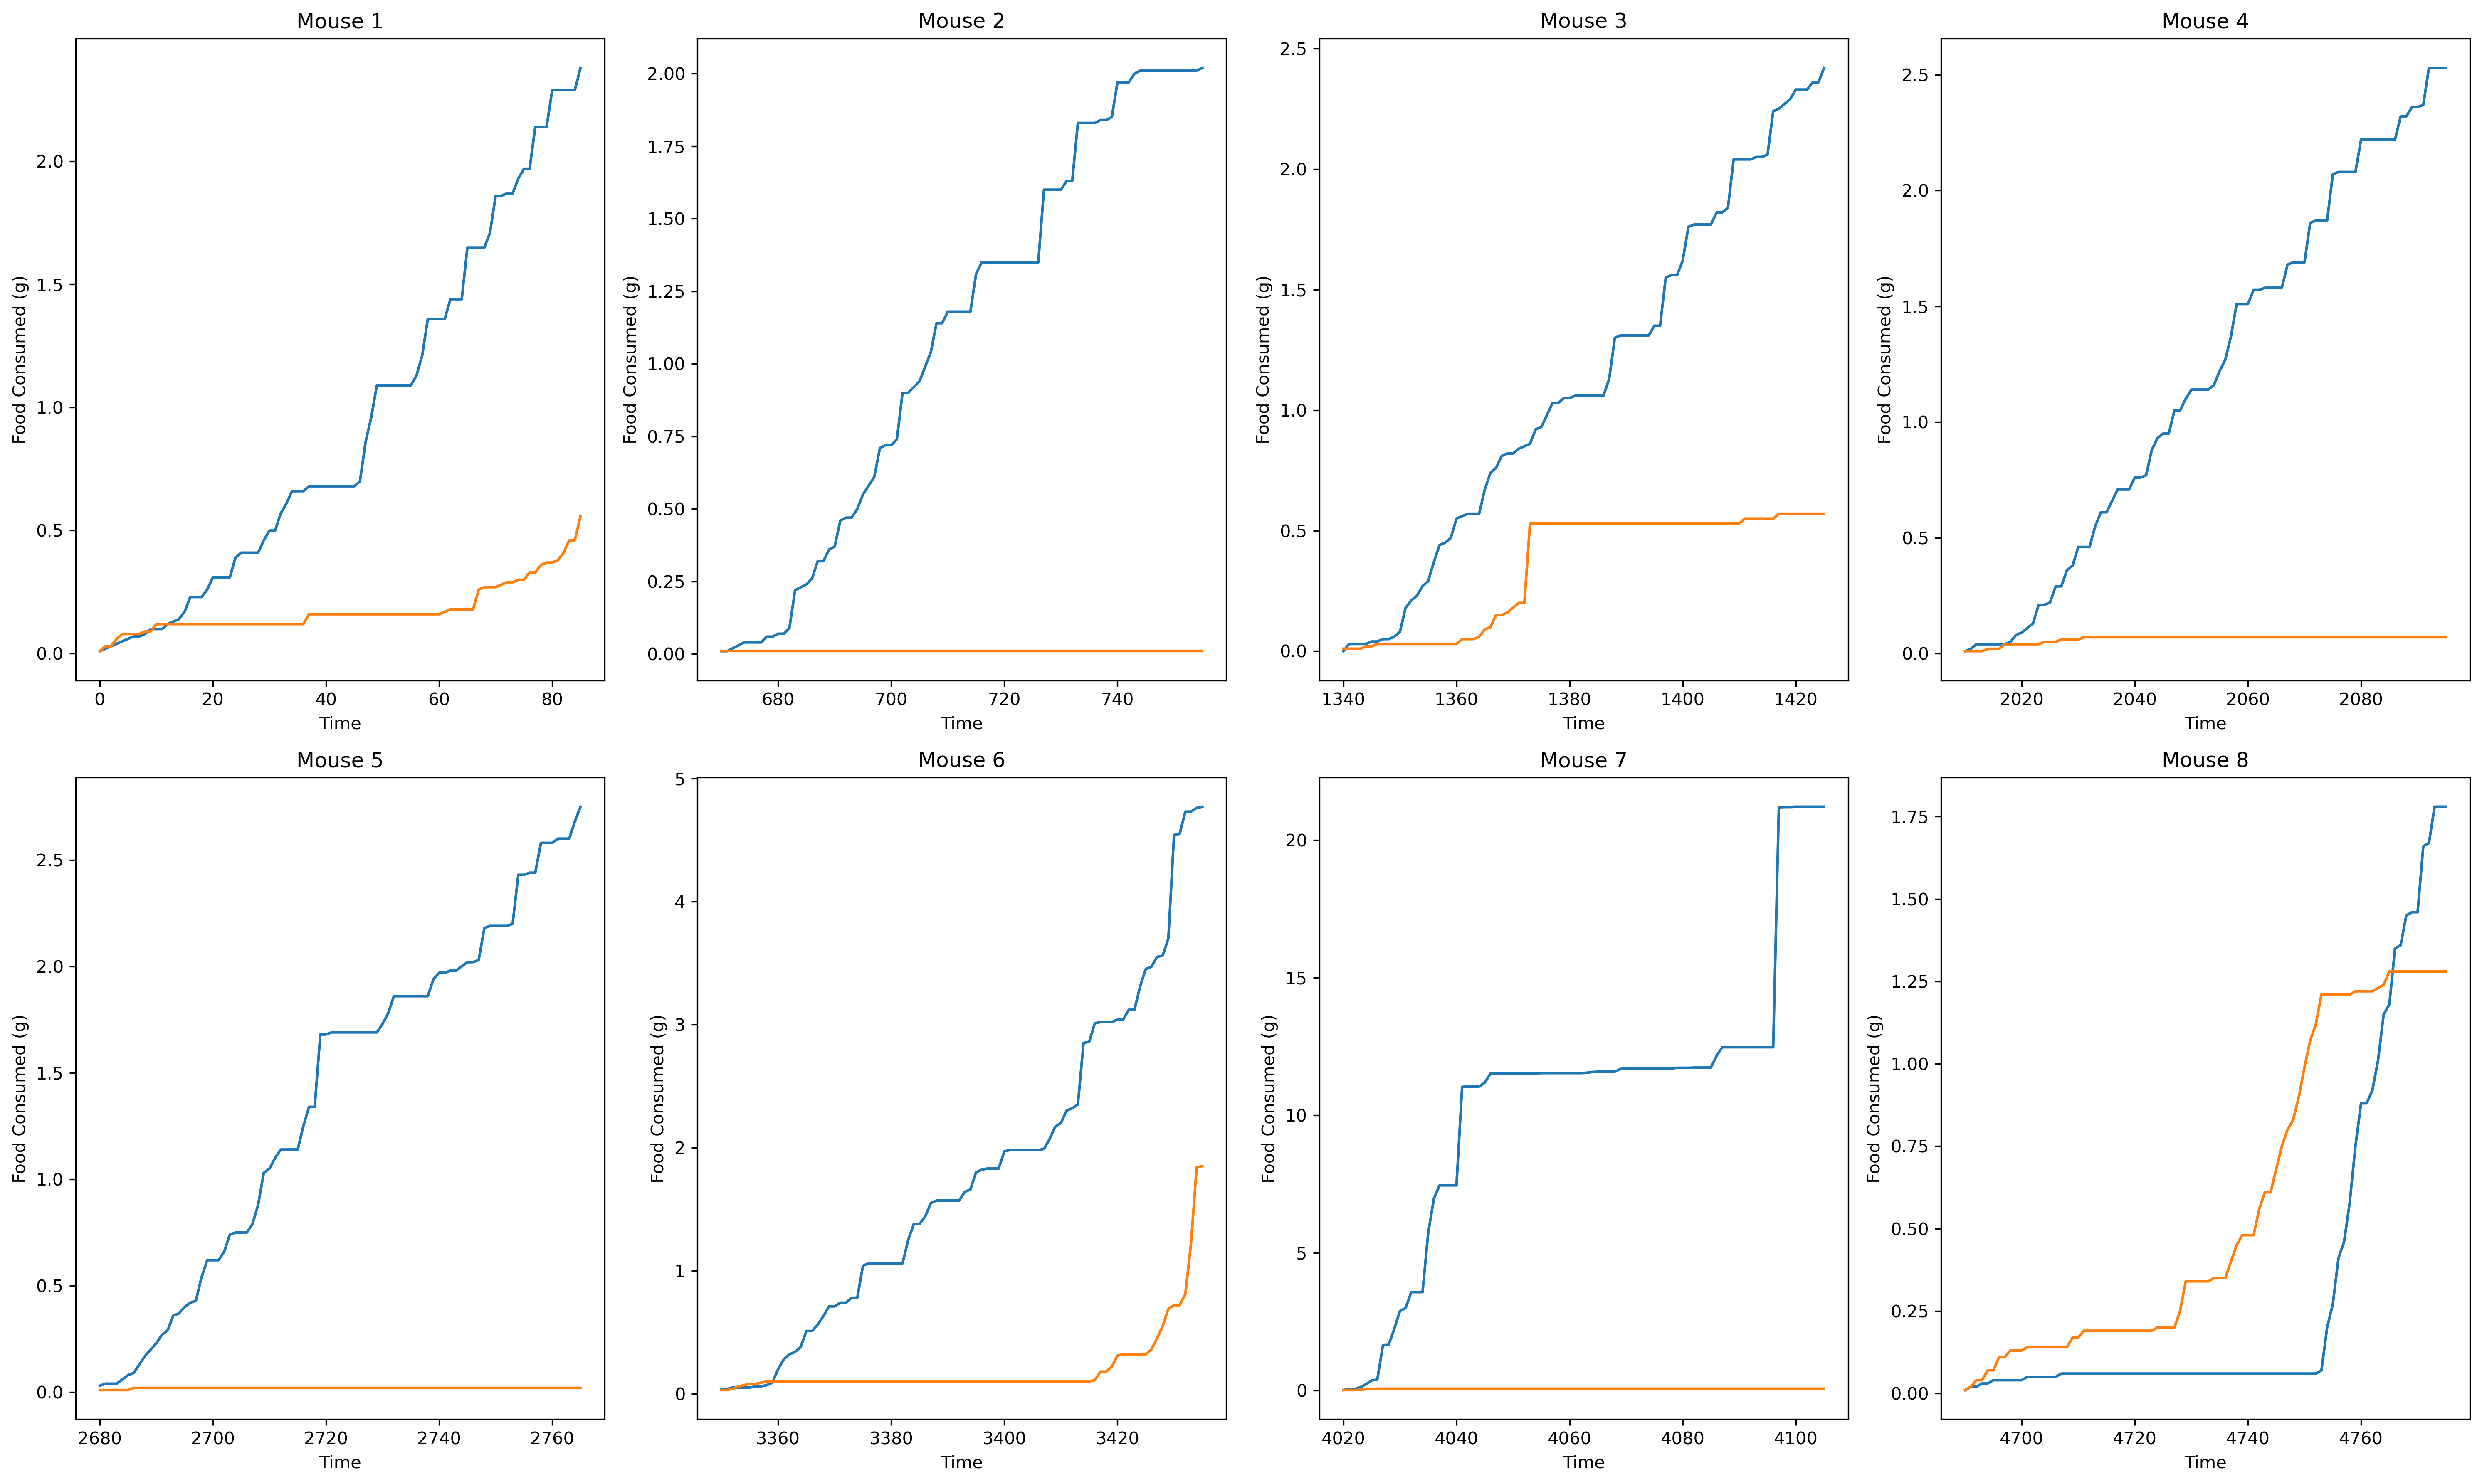

In [8]:
# Plot data for Day 1

fig, ax = plt.subplots(2, 4, figsize= (20, 12), dpi=300)
ax = ax.ravel()

for i in range(len(boxdata)-1):
    
    ax[i].plot(dates_boxdata[i+1][0]["Drink1"])
    ax[i].plot(dates_boxdata[i+1][0]["Feed1"])
    ax[i].set_title(title[i])
    ax[i].set_xlabel("Time")
    ax[i].set_ylabel("Food Consumed (g)")

plt.tight_layout()

# plt.plot(dates_boxdata[1][0]["Drink1"])
# plt.plot(dates_boxdata[1][0]["Feed1"])

In [23]:
# Create a function to measure food intake in each time interval

def foodintake(date_box_array, foodtype):
    # Create an empty array to store time intervals and food consumed
    time_int = np.arange(0, 9 * len(date_box_array), 9) # units: Minutes since trial start
    food_int = np.zeros(len(date_box_array)) # units: Grams consumed in each interval
    
    for i in range(len(date_box_array) - 1):
        food_int[i] = date_box_array[foodtype].iloc[i + 1] - date_box_array[foodtype].iloc[i]
        
    return time_int, food_int

# Output: ie foodintake(dates_boxdata[1][0], 'Drink1')[0] gives time array, [1] gives food consumed array

In [44]:
# Create a function to obtain food intake data for each box (for each day too)

def foodintakebox(dates_boxdata_array):
    breederintake_boxdata = []
    chowintake_boxdata = []
    
    for i in range(len(dates)):
        breederintake_boxdata.append(foodintake(dates_boxdata_array[i], 'Drink1'))
        chowintake_boxdata.append(foodintake(dates_boxdata_array[i], 'Feed1'))
    
    return breederintake_boxdata, chowintake_boxdata

# Output syntax: ie foodintakebox(dates_boxdata[box number])[0 or 1][day number 0-4]
    # [0] gives breeder, [1] gives chow

In [72]:
# Evaluate food intakes for each box 

foodintakedata = []

for i in range(len(boxdata)):
    foodintakedata.append(foodintakebox(dates_boxdata[i]))
    
# Output: foodintakedata[box number][breeder vs. chow 0-1][day number 0-4][time vs. intake 0-1]

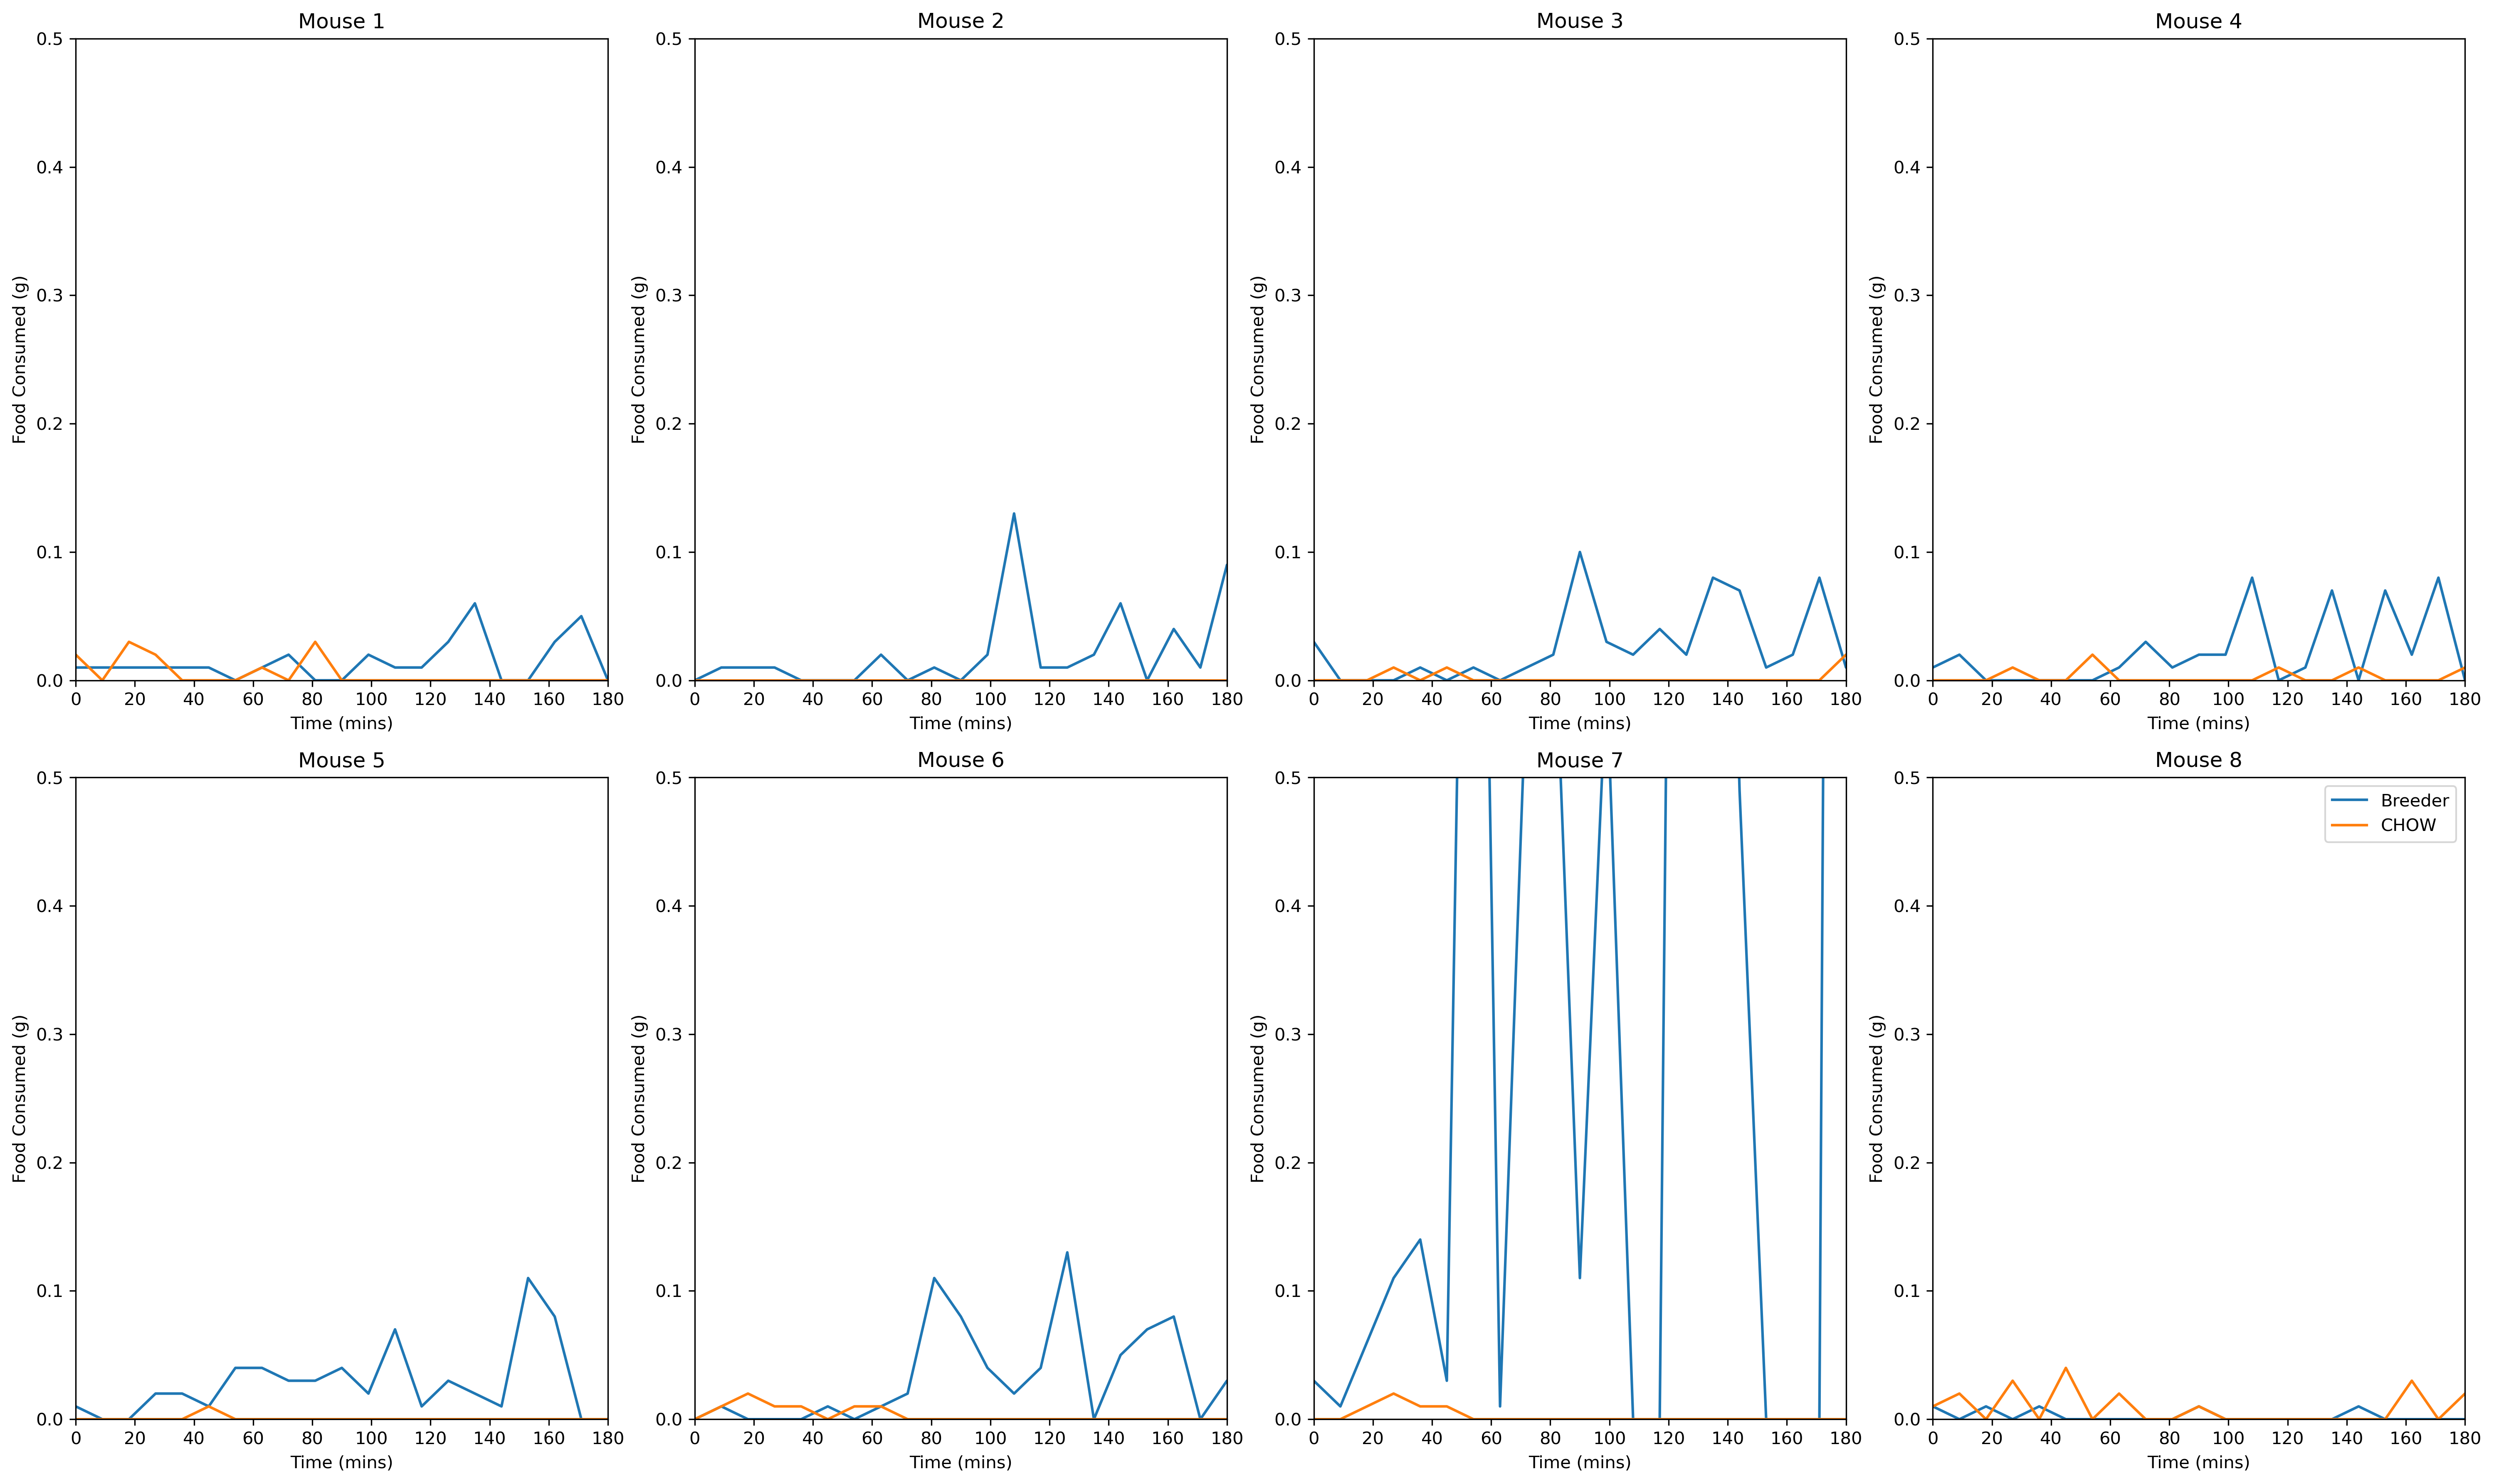

In [180]:
# Plot data for Day 1

fig, ax = plt.subplots(2, 4, figsize= (20, 12), dpi=300)
ax = ax.ravel()

for i in range(len(boxdata)-1):
    
    ax[i].plot(foodintakedata[i+1][0][0][0], foodintakedata[i+1][0][0][1])
    ax[i].plot(foodintakedata[i+1][1][0][0], foodintakedata[i+1][1][0][1])
    ax[i].set_ylim(0, 0.5)
    ax[i].set_xlim(0, 180)
    ax[i].set_title(title[i])
    ax[i].set_xlabel("Time (mins)")
    ax[i].set_ylabel("Food Consumed (g)")

plt.legend(labels=['Breeder', 'CHOW'])
plt.tight_layout()
plt.show()

In [109]:
# Find the total amt of food consumed per day for each food and each mouse

def totalfood(foodintakebox_array):
    
    sum_breederintake_boxdata = []
    sum_chowintake_boxdata = []
    
    for i in range(len(dates)):
        sum_breederintake_boxdata.append(np.sum(foodintakebox_array[0][i][1]))
        sum_chowintake_boxdata.append(np.sum(foodintakebox_array[1][i][1]))
    
    return sum_breederintake_boxdata, sum_chowintake_boxdata

# Output syntax: ie totalfood(dates_boxdata[box number])[0 or 1][day number 0-4]
    # [0] gives breeder total, [1] gives chow total

In [110]:
# Evaluate food intakes for each box 

totalfoodintakedata = []

for i in range(len(boxdata)):
    totalfoodintakedata.append(totalfood(foodintakedata[i]))
    
# Output: totalfoodintakedata[box number][breeder vs. chow 0-1][day number 0-4] gives the total intake of that day

In [140]:
# Find average intake per day per condition

breedertotal = np.zeros(len(dates))
chowtotal = np.zeros(len(dates))

breederavg = np.zeros(len(dates))
chowavg = np.zeros(len(dates))

for i in range(len(dates)):
    breedertotal[i] = totalfoodintakedata[1][0][i] + totalfoodintakedata[2][0][i] + totalfoodintakedata[3][0][i] + totalfoodintakedata[4][0][i] + totalfoodintakedata[5][0][i] + totalfoodintakedata[6][0][i] + totalfoodintakedata[7][0][i] + totalfoodintakedata[8][0][i]
    chowtotal[i] = totalfoodintakedata[1][1][i] + totalfoodintakedata[2][1][i] + totalfoodintakedata[3][1][i] + totalfoodintakedata[4][1][i] + totalfoodintakedata[5][1][i] + totalfoodintakedata[6][1][i] + totalfoodintakedata[7][1][i] + totalfoodintakedata[8][1][i]
    
    breederavg[i] = (1/8) * breedertotal[i]
    chowavg[i] = (1/8) * chowtotal[i]

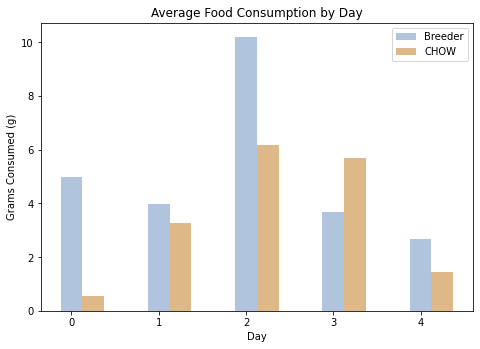

<Figure size 432x288 with 0 Axes>

In [187]:
x = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(x + 0.00, breederavg, color = 'lightsteelblue', width = 0.25)
ax.bar(x + 0.25, chowavg, color = 'burlywood', width = 0.25)

ax.set_title('Average Food Consumption by Day')
ax.set_xlabel('Day')
ax.set_ylabel('Grams Consumed (g)')
ax.legend(labels=['Breeder', 'CHOW'])

plt.show()
# plt.savefig('avgfood_byday.jpg')

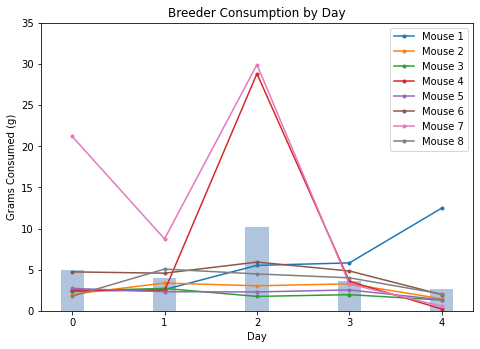

<Figure size 432x288 with 0 Axes>

In [189]:
x = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(x + 0.00, breederavg, color = 'lightsteelblue', width = 0.25)

ax.plot(totalfoodintakedata[1][0], marker = ".")
ax.plot(totalfoodintakedata[2][0], marker = ".")
ax.plot(totalfoodintakedata[3][0], marker = ".")
ax.plot(totalfoodintakedata[4][0], marker = ".")
ax.plot(totalfoodintakedata[5][0], marker = ".")
ax.plot(totalfoodintakedata[6][0], marker = ".")
ax.plot(totalfoodintakedata[7][0], marker = ".")
ax.plot(totalfoodintakedata[8][0], marker = ".")

ax.legend(labels = title)

ax.set_ylim(0, 35)
ax.set_title('Breeder Consumption by Day')
ax.set_xlabel('Day')
ax.set_ylabel('Grams Consumed (g)')

plt.show()
# plt.savefig('breederconsumption_byday.jpg')

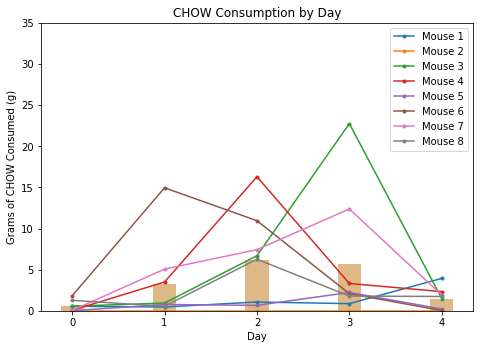

<Figure size 432x288 with 0 Axes>

In [188]:
x = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(x + 0.00, chowavg, color = 'burlywood', width = 0.25)
ax.plot(totalfoodintakedata[1][1], marker = ".")
ax.plot(totalfoodintakedata[2][1], marker = ".")
ax.plot(totalfoodintakedata[3][1], marker = ".")
ax.plot(totalfoodintakedata[4][1], marker = ".")
ax.plot(totalfoodintakedata[5][1], marker = ".")
ax.plot(totalfoodintakedata[6][1], marker = ".")
ax.plot(totalfoodintakedata[7][1], marker = ".")
ax.plot(totalfoodintakedata[8][1], marker = ".")

ax.legend(labels = title)

ax.set_ylim(0, 35)
ax.set_title('CHOW Consumption by Day')
ax.set_xlabel('Day')
ax.set_ylabel('Grams of CHOW Consumed (g)')

plt.show()
# plt.savefig('chowconsumption_byday.jpg')